In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [16]:
raw_data = pd.read_csv("Audiobooks_data_with_col.csv")

In [17]:
raw_data

,ID,book_length_overall,book_length_avg,price_overall,price_avg,isReview,rating,completion,minutes_listened,support_requested,time_length,target
0,873,2160.0,2160,10.13,10.13,0,8.91,0.00,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.00,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.00,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.00,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.00,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14079,27398,2160.0,2160,7.99,7.99,0,8.91,0.00,0.0,0,54,0
14080,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,0.0,0,4,0
14081,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,0.0,0,29,0
14082,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0


In [18]:
raw_data[raw_data["target"] == 1]

,ID,book_length_overall,book_length_avg,price_overall,price_avg,isReview,rating,completion,minutes_listened,support_requested,time_length,target
0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,5646,1620.0,1620,5.33,5.33,0,8.91,0.0,0.0,0,0,1
2233,8782,1476.0,4428,5.33,16.00,0,8.91,0.0,0.0,0,0,1
2234,15827,2160.0,2160,5.33,5.33,0,8.91,0.0,0.0,0,12,1
2235,20609,2160.0,2160,5.33,5.33,1,10.00,0.0,0.0,0,6,1


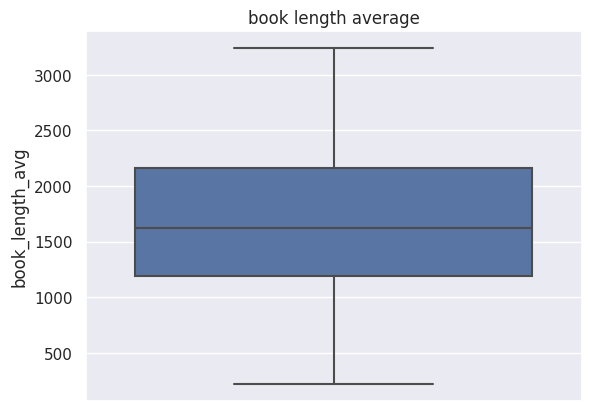

In [52]:
sns.boxplot(data = raw_data[raw_data["book_length_avg"] < raw_data["book_length_avg"].quantile(0.98)],y="book_length_avg")
# sns.kdeplot(data = raw_data,x="book_length_avg",cumulative = True)
plt.title("book length average")
plt.savefig("book_length_boxplot")

In [26]:
raw_data["book_length_avg"].describe()
# plt.title("book length average")
# plt.savefig("book_length_avg_kde")

count    14084.000000
mean      1678.608634
std        654.838599
min        216.000000
25%       1188.000000
50%       1620.000000
75%       2160.000000
max       7020.000000
Name: book_length_avg, dtype: float64

count    14084.000000
mean         7.543805
std          5.560129
min          3.860000
25%          5.330000
50%          6.070000
75%          8.000000
max        130.940000
Name: price_avg, dtype: float64

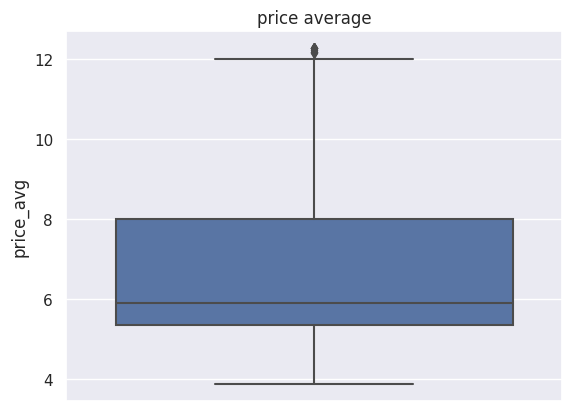

In [55]:
sns.boxplot(data = raw_data[raw_data["price_avg"] < raw_data["price_avg"].quantile(0.95)],y="price_avg")
plt.title("price average")
plt.savefig("price_avg_boxplot")
raw_data["price_avg"].describe()

count    14084.000000
mean         0.125659
std          0.241206
min          0.000000
25%          0.000000
50%          0.000000
75%          0.130000
max          1.000000
Name: completion, dtype: float64

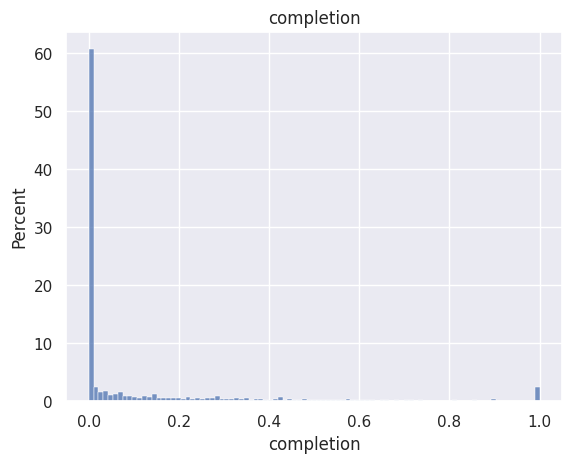

In [48]:
sns.histplot(data = raw_data,x="completion",stat="percent")
plt.title("completion")
plt.savefig("Book Completion")
raw_data["completion"].describe()

<Axes: xlabel='target', ylabel='completion'>

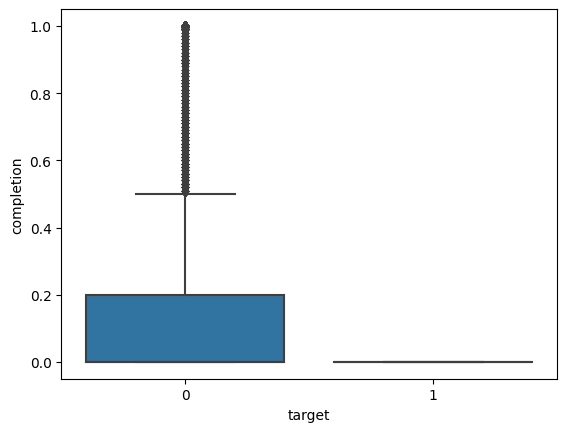

In [9]:
sns.boxplot(data = raw_data,y = "completion",x="target")

0    0.841167
1    0.158833
Name: target, dtype: float64

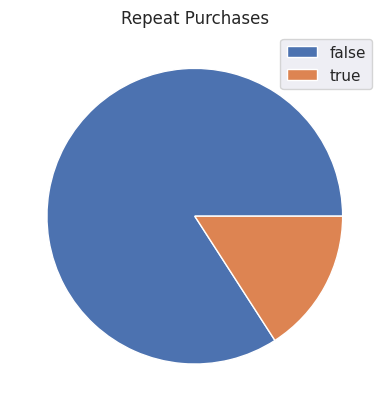

In [47]:
plt.pie(raw_data["target"].value_counts())
plt.legend(["false","true"])
plt.title("Repeat Purchases")
plt.savefig("targer_pie_chart")

raw_data["target"].value_counts() / raw_data.shape[0]

In [11]:
data2 = raw_data[raw_data["price_avg"] < raw_data["price_avg"].quantile(0.97)]

<Axes: xlabel='price_avg', ylabel='Density'>

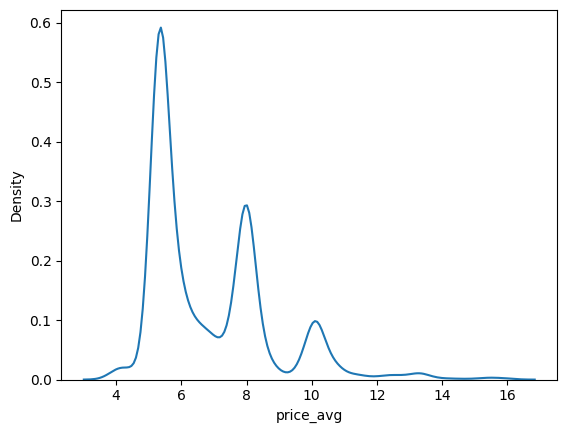

In [12]:
sns.kdeplot(data = data2,x="price_avg")

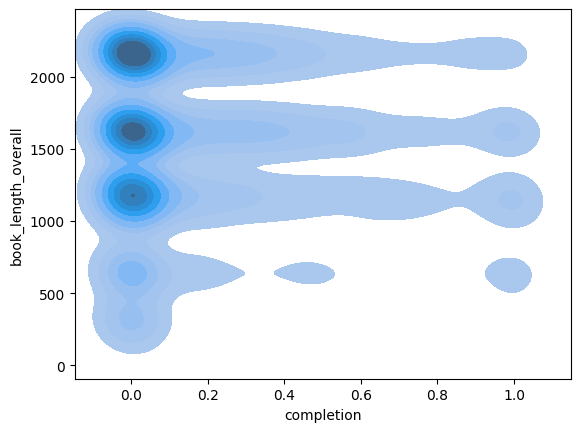

In [13]:
sns.kdeplot(data = raw_data,x="completion",y="book_length_overall",fill = True)
plt.savefig("book_length_overall_and_completion")